a) Plot the weather data on a 2D graph where:
- No Rain (y = 0) is represented as blue squares.
- Rain (y = 1) is represented as red circles.
- Include labels, a title, and a legend for clarity.

In [ ]:
import pandas as pd

wd = pd.read_csv("/WeatherData_Q3.csv")
wd.head()

,temp,humid,rain
0,0.15,0.20,0
1,0.18,0.15,0
2,0.22,0.25,0
3,0.25,0.18,0
4,0.30,0.28,0


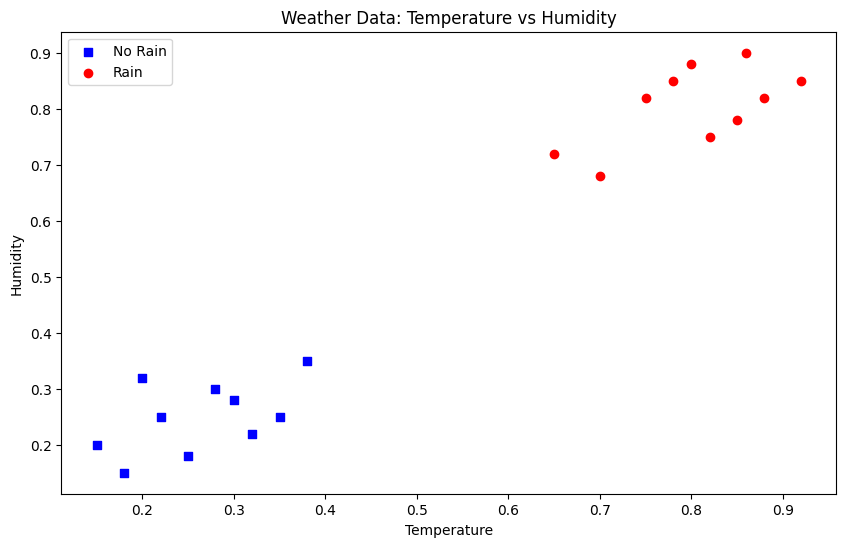

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(wd[wd['rain'] == 0]['temp'], wd[wd['rain'] == 0]['humid'],
            color='blue', marker='s', label='No Rain')

plt.scatter(wd[wd['rain'] == 1]['temp'], wd[wd['rain'] == 1]['humid'],
            color='red', marker='o', label='Rain')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Weather Data: Temperature vs Humidity')
plt.legend()

plt.show()

In [ ]:
import random

class Perceptron:
    def __init__(self, learning_rate=0.1, max_iterations=1000):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        self.weights = []
        self.bias = 0.0

    def _unit_step(self, x):
        """Unit step activation function."""
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        """
        Train the Perceptron.
        X: list (or array) of [x1, x2, ...] feature vectors
        y: list/array of labels (0 or 1)
        """
        num_features = len(X[0])

        # Initialize weights randomly in [-0.5, 0.5] and bias similarly
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5, 0.5)

        for _ in range(self.max_iterations):
            error_count = 0
            # Go through each training sample
            for features, label in zip(X, y):
                # Compute weighted sum
                weighted_sum = sum(w * f for w, f in zip(self.weights, features)) + self.bias
                # Perceptron output
                prediction = self._unit_step(weighted_sum)
                # Error
                error = label - prediction

                # Update if there's an error
                if error != 0:
                    error_count += 1
                    # Update each weight
                    for i in range(num_features):
                        self.weights[i] += self.lr * error * features[i]
                    # Update bias
                    self.bias += self.lr * error

            # If no errors in this epoch, we've converged early, so break
            if error_count == 0:
                break

    def predict(self, X):
        """
        Predict labels for given inputs.
        X: list (or array) of [x1, x2, ...] feature vectors
        Returns a list of predictions (0 or 1).
        """
        predictions = []
        for features in X:
            weighted_sum = sum(w * f for w, f in zip(self.weights, features)) + self.bias
            prediction = self._unit_step(weighted_sum)
            predictions.append(prediction)
        return predictions

    def score(self, X, y):
        """
        Compute accuracy of predictions.
        X: list (or array) of [x1, x2, ...] feature vectors
        y: list/array of true labels (0 or 1)
        """
        preds = self.predict(X)
        correct = sum(int(p == t) for p, t in zip(preds, y))
        return correct / len(y)

def main():
    # Assumes columns: "Temperature", "Humidity", "Rainfall"
    # Convert "Rainfall" to numeric 0/1 if needed
    # If it is already 0/1, leave as is.
    # Example if you have 'Yes'/'No' instead of 1/0:
    # wd['Rainfall'] = wd['Rainfall'].map({'No': 0, 'Yes': 1})

    # Prepare feature matrix and label vector
    X = wd[['Temperature', 'Humidity']].values  # shape: (num_samples, 2)
    y = wd['Rainfall'].values                   # shape: (num_samples,)

    # Split into training (first 15) and testing (last 5)
    # Adjust indices if you have a different dataset size or split
    X_train, y_train = X[:15], y[:15]
    X_test, y_test = X[15:], y[15:]

    # Create and train Perceptron
    perceptron = Perceptron(learning_rate=0.1, max_iterations=1000)
    perceptron.fit(X_train, y_train)

    # Evaluate on training data
    train_accuracy = perceptron.score(X_train, y_train)
    # Evaluate on test data
    test_accuracy = perceptron.score(X_test, y_test)

    print(f"Training accuracy: {train_accuracy:.2f}")
    print(f"Test accuracy:     {test_accuracy:.2f}")

if __name__ == "__main__":
    main()

NameError: name 'wd' is not defined

b) Implement a Perceptron Model (Manually, Without Scikit-Learn)
- Implement a perceptron algorithm manually in Python or Java
- Train the model using weather_2025.csv as input.
- Procedure:
- Split the dataset into a training set (first 15 instances) and a test set (last five
instances)
    - Train the perceptron for a maximum of 1000 iterations using temperature and
humidity as inputs to predict rainfall
    - Report the training and test accuracy after training
    - The perceptron must be implemented from scratch (i.e., manually coding the
weight updates, activation function, and learning algorithm)
    - Use a learning rate of 0.1
    - Initialize weights randomly between -0.5 and 0.5
    - Include a bias term in your implementation

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
wd = pd.read_csv("/WeatherData_Q3.csv")

# Split the dataset into training (first 15 instances) and test (last 5 instances)
train_data = wd.iloc[:15]
test_data = wd.iloc[15:]

# Extract features (temperature, humidity) and target (rain)
X_train = train_data[['temp', 'humid']].values
y_train = train_data['rain'].values

X_test = test_data[['temp', 'humid']].values
y_test = test_data['rain'].values

# Initialize weights and bias randomly between -0.5 and 0.5
np.random.seed(42)  # For reproducibility
weights = np.random.uniform(-0.5, 0.5, size=2)
bias = np.random.uniform(-0.5, 0.5)

# Define the learning rate and maximum iterations
learning_rate = 0.1
max_iterations = 1000

# Activation function (Step function)
def activation_function(z):
    return 1 if z >= 0 else 0

# Training the Perceptron
for iteration in range(max_iterations):
    for i in range(len(X_train)):
        # Compute the weighted sum
        weighted_sum = np.dot(X_train[i], weights) + bias

        # Apply the activation function
        prediction = activation_function(weighted_sum)

        # Update weights and bias
        error = y_train[i] - prediction
        weights += learning_rate * error * X_train[i]
        bias += learning_rate * error

# Function to calculate accuracy
def calculate_accuracy(X, y, weights, bias):
    correct = 0
    for i in range(len(X)):
        weighted_sum = np.dot(X[i], weights) + bias
        prediction = activation_function(weighted_sum)
        if prediction == y[i]:
            correct += 1
    return correct / len(X)

# Calculate training and test accuracy
train_accuracy = calculate_accuracy(X_train, y_train, weights, bias)
test_accuracy = calculate_accuracy(X_test, y_test, weights, bias)

# Report results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Final Weights:", weights)
print("Final Bias:", bias)

Training Accuracy: 1.0
Test Accuracy: 1.0
Final Weights: [-0.10245988  0.45371431]
Final Bias: -0.16800605818859493


c) Evaluate the Perceptron's Performance:
- Does the perceptron separate the two classes (rain vs. no rain)?

Yes, since 100% training and test accuracy is reached.
- Based on the dataset's pattern, explain why or why not the perceptron works well (or
fails).

Since the dataset is small and linearly seperable, it performs well with the perceptron.
- Suggest possible improvements (e.g., using a different model or feature engineering).

We could use a model like Logistic Regression or a neural network, which would likely work better though would be much more complex.
- Plot the decision boundary on the same graph as your data points

(plotted below)
- Experiment with at least two different train/test splits and compare the results

(results and comparison below)
- Discuss how different learning rates might affect the model's performance

Slower/smaller learning rates would converge slower but will likely find a decent solution (aka less likely to overshoot the optimal solution), and faster/bigger learning rates will converge faster but have a higher risk of overshooting and producing undesirable results.

"Plot the decision boundary on the same graph as your data points"

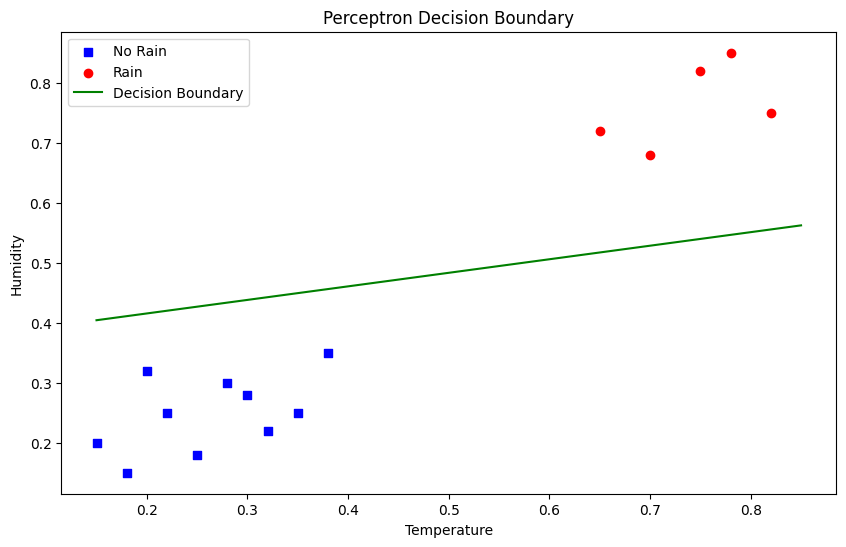

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', marker='s', label='No Rain')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', marker='o', label='Rain')

x_values = np.linspace(min(X_train[:, 0]), max(X_train[:, 1]), 100)
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, color='green', label='Decision Boundary')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

"Experiment with at least two different train/test splits and compare the results"

- 10 training 10 testing:

Training Accuracy: 1.0

Test Accuracy: 0.0

Final Weights: [-0.20045988  0.35871431]

Final Bias: -0.16800605818859493

- 5 training 15 testing:

Training Accuracy: 1.0

Test Accuracy: 0.8666666666666667

Final Weights: [-0.18045988  0.39071431]

Final Bias: -0.06800605818859493


Lets call the first train/test split A, and the second B. A has perfect training accuracy but fails on the test set, which would suggest overfitting, though its odd such a drastic change would occur from such a small change in training/testing split. B does far better, with perfect training accuracy and 86% on the test set, thus 5/15 is far better than 10/10, with 15/5 still seeming to be the best.